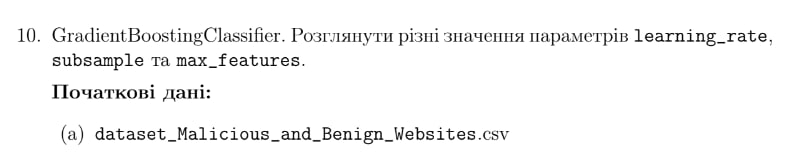

In [609]:
import pandas as pd
import numpy as np
import sklearn.metrics as metrics
import matplotlib.pyplot as plt
import seaborn as sns
# для пошуку зміщення та дисперсії ми будемо використовувати бібліотеку mlxtend
# conda install -c conda-forge mlxtend
from mlxtend.evaluate import bias_variance_decomp

sns.set(rc={'figure.figsize':(14, 8)})

In [610]:
def scoring_and_matrix(y_true, y_predicted):
    confussion = metrics.confusion_matrix(y_true, y_predicted)
    sns.heatmap(confussion, annot=True, fmt='g', cmap='Blues')
    print(f'accuracy: {metrics.accuracy_score(y_true, y_predicted)} \n \
    precision: {metrics.precision_score(y_true, y_predicted)} \n \
    recall: {metrics.recall_score(y_true, y_predicted)} \n \
    f1_score: {metrics.f1_score(y_true, y_predicted)}' )

In [611]:
def bias_var(bias, var):
    print(f'Bias: {bias}, var: {var}')

In [612]:
def gridsearchscore(classifier):
    print(f'Best score: {classifier.best_score_}, Best params: {classifier.best_params_}')

In [613]:
dataset = pd.read_csv('websites.csv')

Підготовка даних:

In [614]:
dataset.describe(include='all')

,URL,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,CONTENT_LENGTH,WHOIS_COUNTRY,WHOIS_STATEPRO,WHOIS_REGDATE,WHOIS_UPDATED_DATE,...,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
count,1781,1781.000000,1781.000000,1781,1780,969.000000,1781,1781,1781,1781,...,1781.000000,1781.000000,1.781000e+03,1781.000000,1781.000000,1.781000e+03,1.781000e+03,1781.000000,1780.000000,1781.000000
unique,1781,NaN,NaN,9,239,NaN,49,182,891,594,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,M0_109,NaN,NaN,UTF-8,Apache,NaN,US,CA,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,676,386,NaN,1103,372,127,139,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,56.961258,11.111735,NaN,NaN,11726.927761,NaN,NaN,NaN,NaN,...,5.472768,3.060640,2.982339e+03,18.540146,18.746210,1.589255e+04,3.155599e+03,18.540146,2.263483,0.121280
std,NaN,27.555586,4.549896,NaN,NaN,36391.809051,NaN,NaN,NaN,NaN,...,21.807327,3.386975,5.605057e+04,41.627173,46.397969,6.986193e+04,5.605378e+04,41.627173,2.930853,0.326544
min,NaN,16.000000,5.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
25%,NaN,39.000000,8.000000,NaN,NaN,324.000000,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
50%,NaN,49.000000,10.000000,NaN,NaN,1853.000000,NaN,NaN,NaN,NaN,...,0.000000,2.000000,6.720000e+02,8.000000,9.000000,5.790000e+02,7.350000e+02,8.000000,0.000000,0.000000
75%,NaN,68.000000,13.000000,NaN,NaN,11323.000000,NaN,NaN,NaN,NaN,...,5.000000,5.000000,2.328000e+03,26.000000,25.000000,9.806000e+03,2.701000e+03,26.000000,4.000000,0.000000


In [615]:
dataset.isnull().sum()

URL                            0
URL_LENGTH                     0
NUMBER_SPECIAL_CHARACTERS      0
CHARSET                        0
SERVER                         1
CONTENT_LENGTH               812
WHOIS_COUNTRY                  0
WHOIS_STATEPRO                 0
WHOIS_REGDATE                  0
WHOIS_UPDATED_DATE             0
TCP_CONVERSATION_EXCHANGE      0
DIST_REMOTE_TCP_PORT           0
REMOTE_IPS                     0
APP_BYTES                      0
SOURCE_APP_PACKETS             0
REMOTE_APP_PACKETS             0
SOURCE_APP_BYTES               0
REMOTE_APP_BYTES               0
APP_PACKETS                    0
DNS_QUERY_TIMES                1
Type                           0
dtype: int64

In [616]:
dataset.dtypes

URL                           object
URL_LENGTH                     int64
NUMBER_SPECIAL_CHARACTERS      int64
CHARSET                       object
SERVER                        object
CONTENT_LENGTH               float64
WHOIS_COUNTRY                 object
WHOIS_STATEPRO                object
WHOIS_REGDATE                 object
WHOIS_UPDATED_DATE            object
TCP_CONVERSATION_EXCHANGE      int64
DIST_REMOTE_TCP_PORT           int64
REMOTE_IPS                     int64
APP_BYTES                      int64
SOURCE_APP_PACKETS             int64
REMOTE_APP_PACKETS             int64
SOURCE_APP_BYTES               int64
REMOTE_APP_BYTES               int64
APP_PACKETS                    int64
DNS_QUERY_TIMES              float64
Type                           int64
dtype: object

Видалимо URL (усі значення унікальні) та CONTENT_LENGTH (~50% відсутні) <br>
Я вирішив видалити ознаки з типом даних object, через те, що перетворити на їх на числові типи даних буде складно і на мою думку моделі вони не потрібні

In [617]:
dataset.drop(['CONTENT_LENGTH', 'URL'], axis=1, inplace=True)
dataset.drop(['CHARSET', 'SERVER', 'WHOIS_COUNTRY', 'WHOIS_STATEPRO', 'WHOIS_REGDATE', 'WHOIS_UPDATED_DATE'], axis=1, inplace=True)
dataset.dropna(inplace=True)

Тепер перевіримо корреляції числових ознак:

<AxesSubplot: >

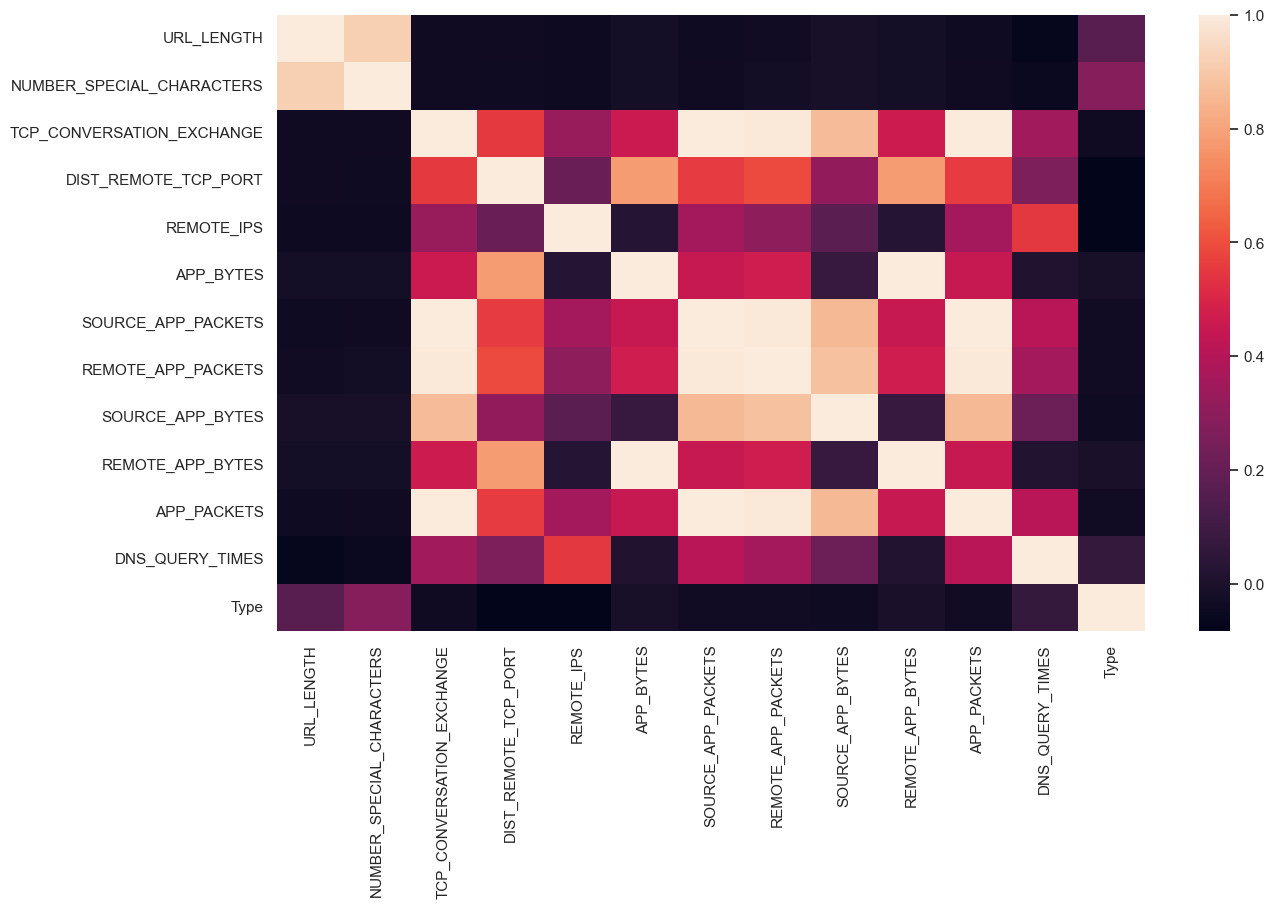

In [618]:
sns.heatmap(dataset.corr())

Ті ознаки, що мають високу кореляцію з іншими буде видалено

In [619]:
dataset.drop(['NUMBER_SPECIAL_CHARACTERS', 'SOURCE_APP_PACKETS', 'TCP_CONVERSATION_EXCHANGE', 'REMOTE_APP_BYTES', 'REMOTE_APP_PACKETS', 'APP_PACKETS'], axis=1, inplace=True)

<AxesSubplot: >

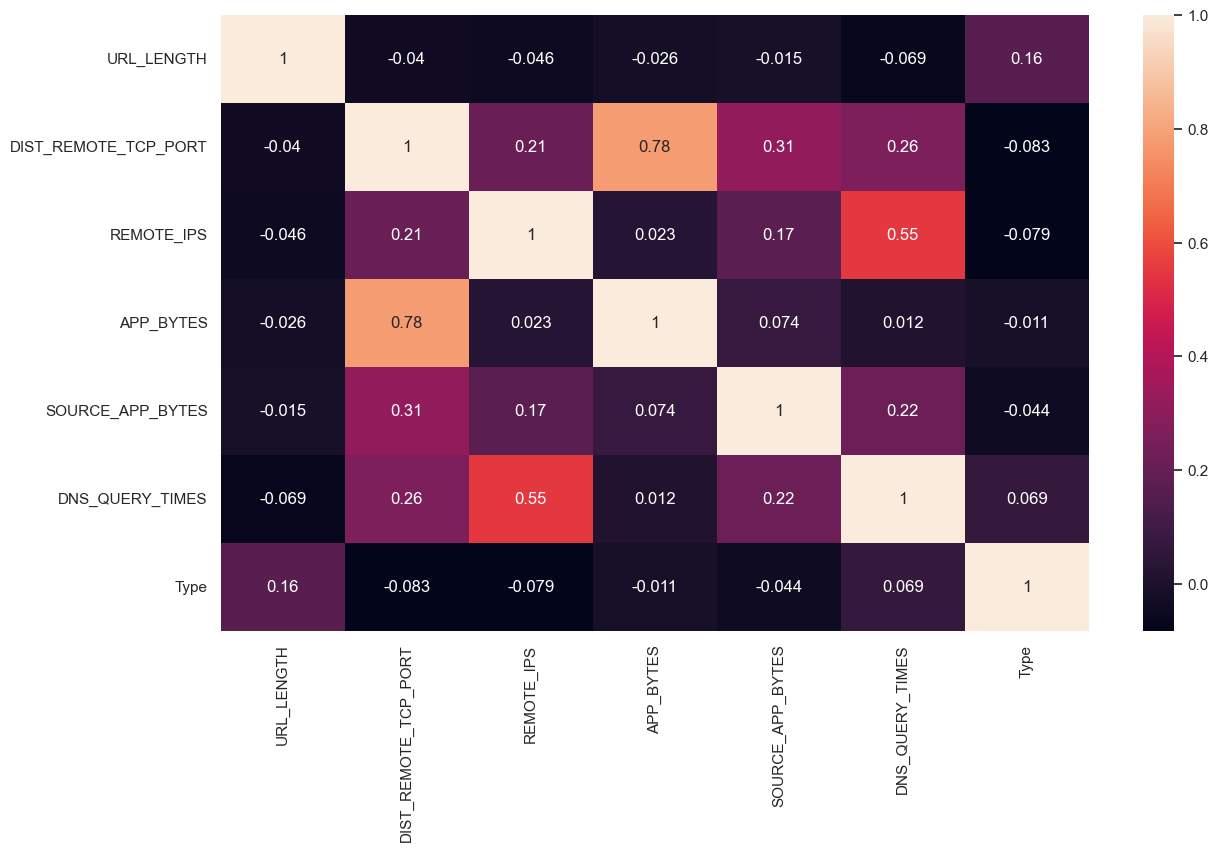

In [620]:
sns.heatmap(dataset.corr(), annot=True)

In [621]:
y_full = dataset['Type']
X_full = dataset.drop(['Type'], axis=1)

Оскільки дані мають не дві ознаки, то дані графічно представлені не будуть

_train - навчальний набір <br>
_perevirka - для налаштування гіперпараметрів <br>
_test - остаточний для тестів

In [622]:
from sklearn.model_selection import train_test_split

X, X_perevirka, y, y_perevirka = train_test_split(X_full, y_full, test_size=0.4, random_state=13)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=13)

In [623]:
X_train.shape

(747, 6)

In [624]:
X_test.shape

(321, 6)

In [625]:
X_perevirka.shape

(712, 6)

Індивідуальна модель дерева:

In [626]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()

In [627]:
tree.fit(X_train, y_train)

DecisionTreeClassifier()

accuracy: 1.0 
     precision: 1.0 
     recall: 1.0 
     f1_score: 1.0


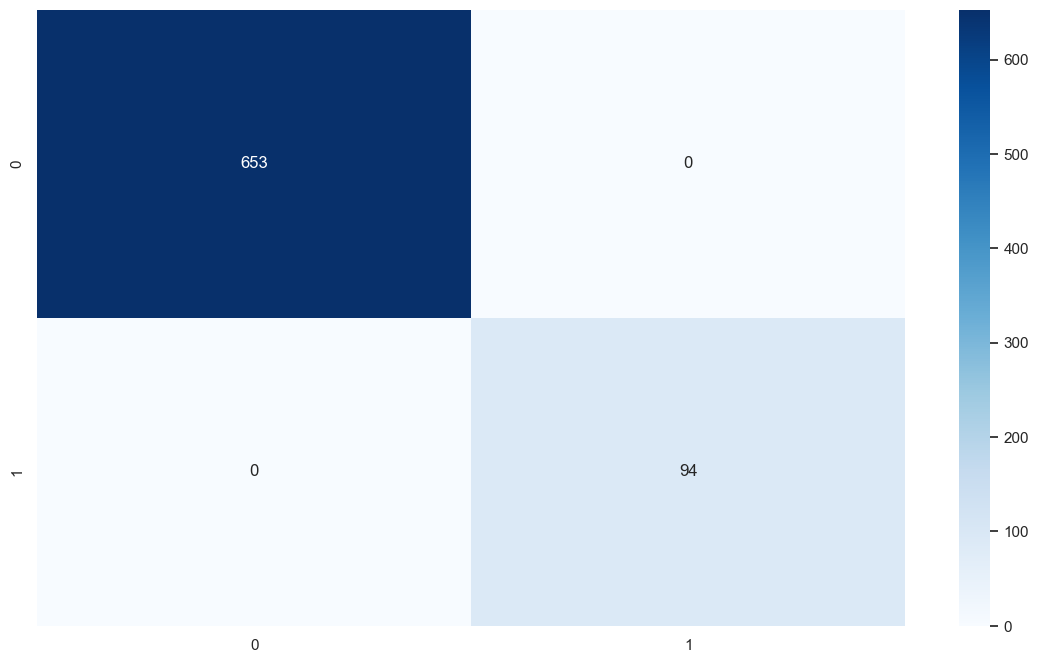

In [628]:
tree_predict = tree.predict(X_train)

scoring_and_matrix(y_train, tree_predict)

accuracy: 0.956386292834891 
     precision: 0.8636363636363636 
     recall: 0.8260869565217391 
     f1_score: 0.8444444444444444


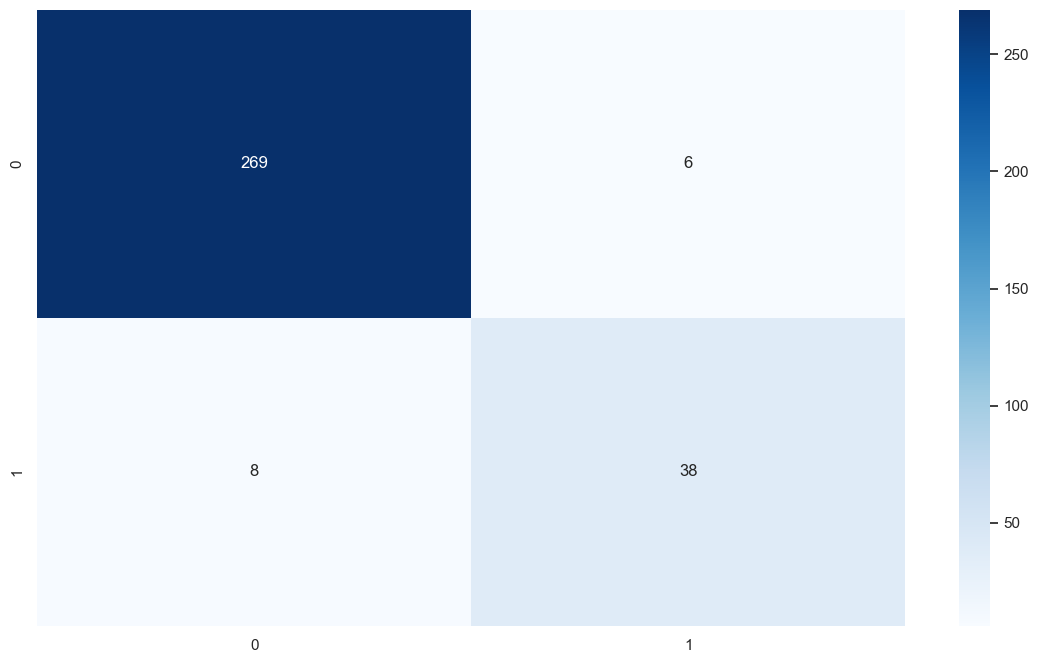

In [629]:
tree_predict = tree.predict(X_test)

scoring_and_matrix(y_test, tree_predict)

accuracy: 0.925561797752809 
     precision: 0.6419753086419753 
     recall: 0.6842105263157895 
     f1_score: 0.6624203821656051


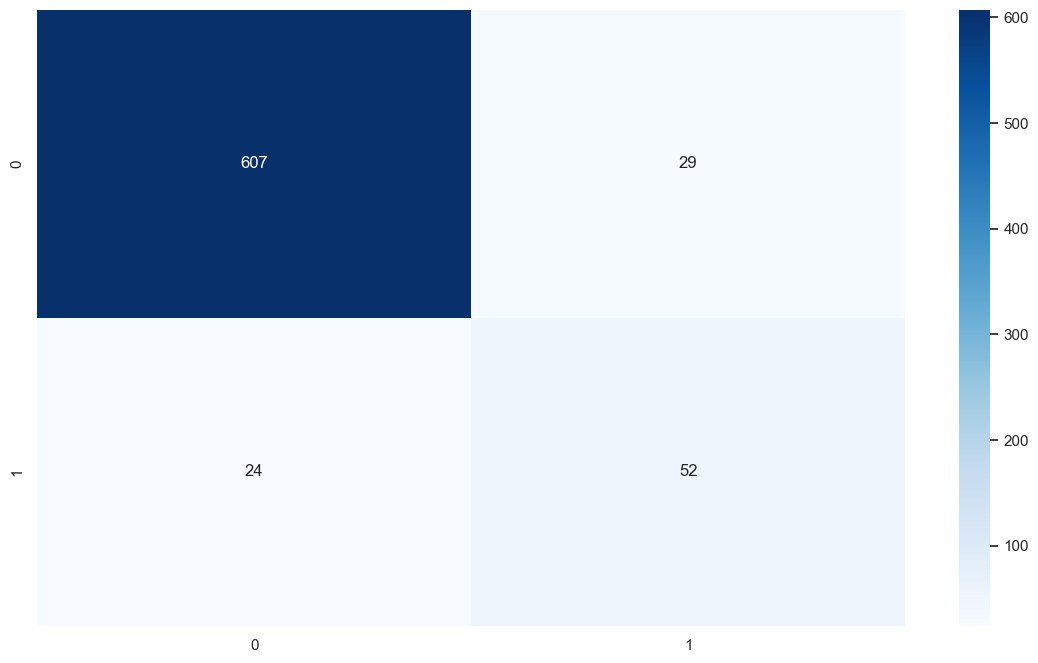

In [630]:
tree_predict = tree.predict(X_perevirka)

scoring_and_matrix(y_perevirka, tree_predict)

Навіть звичайне дерево має дуже високий показник точності, тому налаштування його гіперпараметрів не буде

In [631]:
mse, bias, var = bias_variance_decomp(tree, X_train.values, \
    y_train.values, X_test.values, y_test.values, random_seed=10)
bias_var(bias, var)

Bias: 0.03426791277258567, var: 0.043193146417445476


Зберігання точок для графіку залежності значень показника якостi ансамблю та iндивiдуальної моделi вiд n_estimators буде у масиві points (np.array), x=n_estimators, y=accuracy_score

Навчимо ансамблі з різним значенням n_estimators для графіку, у найкращій з них ми будемо налаштовувати гіперпараметри

In [632]:
from sklearn.ensemble import GradientBoostingClassifier

GBC = GradientBoostingClassifier(n_estimators=10)

In [633]:
GBC.fit(X_train, y_train)

GradientBoostingClassifier(n_estimators=10)

In [634]:
points = np.array([[GBC.n_estimators_, metrics.accuracy_score(y_test, GBC.predict(X_test))]])

In [635]:
GBC = GradientBoostingClassifier(n_estimators=20)
GBC.fit(X_train, y_train)
points = np.append(points, [[len(GBC.estimators_), metrics.accuracy_score(y_test, GBC.predict(X_test))]], axis=0)

In [636]:
GBC = GradientBoostingClassifier(n_estimators=30)
GBC.fit(X_train, y_train)
points = np.append(points, [[len(GBC.estimators_), metrics.accuracy_score(y_test, GBC.predict(X_test))]], axis=0)

In [637]:
GBC = GradientBoostingClassifier(n_estimators=40)
GBC.fit(X_train, y_train)
points = np.append(points, [[len(GBC.estimators_), metrics.accuracy_score(y_test, GBC.predict(X_test))]], axis=0)

In [638]:
GBC = GradientBoostingClassifier(n_estimators=50)
GBC.fit(X_train, y_train)
points = np.append(points, [[len(GBC.estimators_), metrics.accuracy_score(y_test, GBC.predict(X_test))]], axis=0)

In [639]:
GBC = GradientBoostingClassifier(n_estimators=60)
GBC.fit(X_train, y_train)
points = np.append(points, [[len(GBC.estimators_), metrics.accuracy_score(y_test, GBC.predict(X_test))]], axis=0)

In [640]:
GBC = GradientBoostingClassifier(n_estimators=70)
GBC.fit(X_train, y_train)
points = np.append(points, [[len(GBC.estimators_), metrics.accuracy_score(y_test, GBC.predict(X_test))]], axis=0)

In [641]:
GBC = GradientBoostingClassifier(n_estimators=80)
GBC.fit(X_train, y_train)
points = np.append(points, [[len(GBC.estimators_), metrics.accuracy_score(y_test, GBC.predict(X_test))]], axis=0)

In [642]:
GBC = GradientBoostingClassifier(n_estimators=90)
GBC.fit(X_train, y_train)
points = np.append(points, [[len(GBC.estimators_), metrics.accuracy_score(y_test, GBC.predict(X_test))]], axis=0)

In [643]:
GBC = GradientBoostingClassifier(n_estimators=100)
GBC.fit(X_train, y_train)
points = np.append(points, [[len(GBC.estimators_), metrics.accuracy_score(y_test, GBC.predict(X_test))]], axis=0)

In [644]:
GBC = GradientBoostingClassifier(n_estimators=110)
GBC.fit(X_train, y_train)
points = np.append(points, [[len(GBC.estimators_), metrics.accuracy_score(y_test, GBC.predict(X_test))]], axis=0)

c:\Users\Kidma\anaconda3\envs\epam\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


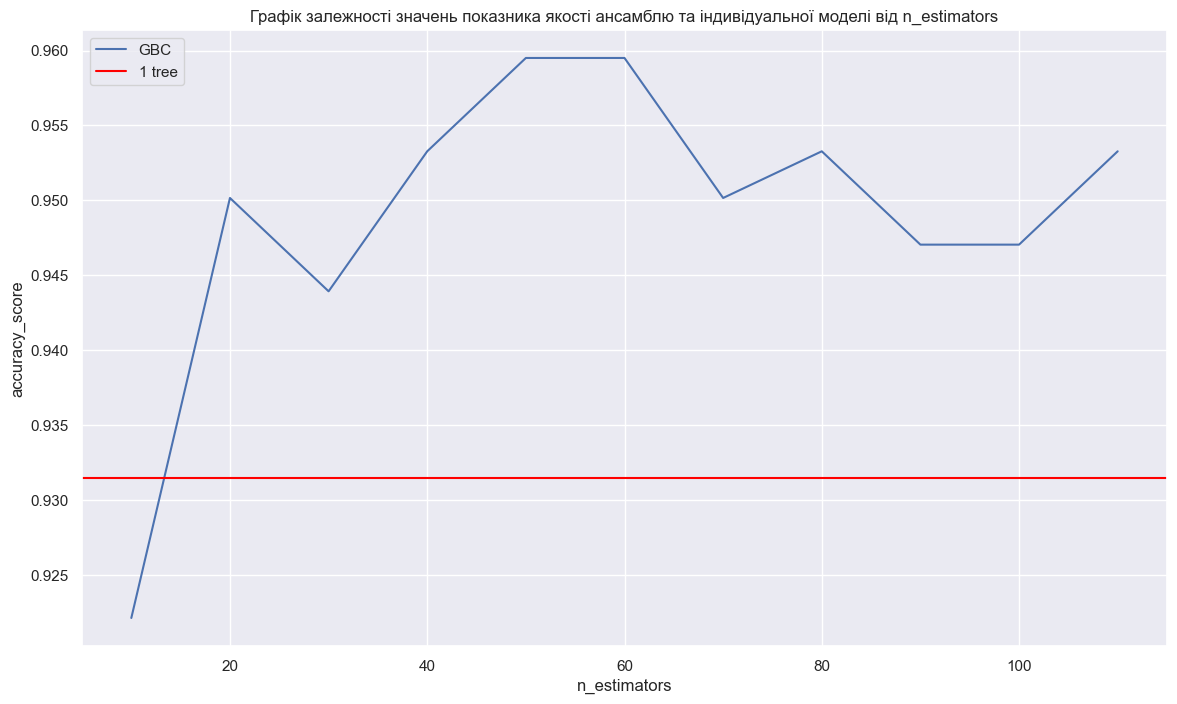

In [645]:
plt.plot(points[:, 0], points[:, 1], label='GBC')
plt.axhline(y=metrics.accuracy_score(y_test, tree.predict(X_test)), color='red', label='1 tree')
plt.title('Графік залежності значень показника якостi ансамблю та iндивiдуальної моделi вiд n_estimators')
plt.xlabel('n_estimators')
plt.ylabel('accuracy_score')
plt.legend(loc="upper left")

Усі моделі швидко навчаються, та майже всі мають accuracy_score вище за індивідуальну модель, таке високе значення точності для індивідуальної моделі мабуть збіг, зазвичай ансамбль буде кращим <br>
Гіперпараметри будемо налаштовувати на n_estimators=50

In [646]:
from sklearn.model_selection import GridSearchCV

GBC = GradientBoostingClassifier(n_estimators=50)

parameters = {
    'learning_rate': [0.5, 1, 1.5],
    'subsample': [0.25, 0.5, 1],
    'max_features': [1, 'sqrt', 'log2']
    }

gridsearch = GridSearchCV(GBC, parameters, scoring='accuracy', n_jobs=-1)

In [647]:
gridsearch.fit(X_perevirka, y_perevirka)

GridSearchCV(estimator=GradientBoostingClassifier(n_estimators=50), n_jobs=-1,
             param_grid={'learning_rate': [0.5, 1, 1.5],
                         'max_features': [1, 'sqrt', 'log2'],
                         'subsample': [0.25, 0.5, 1]},
             scoring='accuracy')

In [648]:
gridsearchscore(gridsearch)

Best score: 0.9368265537279621, Best params: {'learning_rate': 0.5, 'max_features': 'log2', 'subsample': 1}


accuracy: 0.92904953145917 
     precision: 0.7808219178082192 
     recall: 0.6063829787234043 
     f1_score: 0.6826347305389222


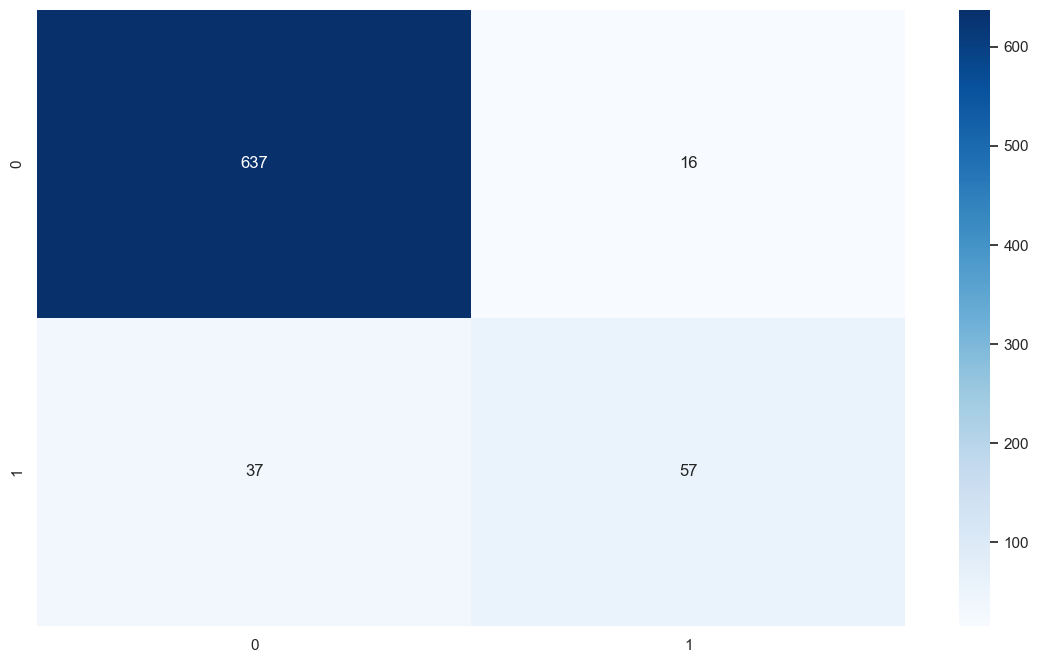

In [649]:
y_predict = gridsearch.predict(X_train)

scoring_and_matrix(y_train, y_predict)

accuracy: 0.956386292834891 
     precision: 0.8809523809523809 
     recall: 0.8043478260869565 
     f1_score: 0.8409090909090908


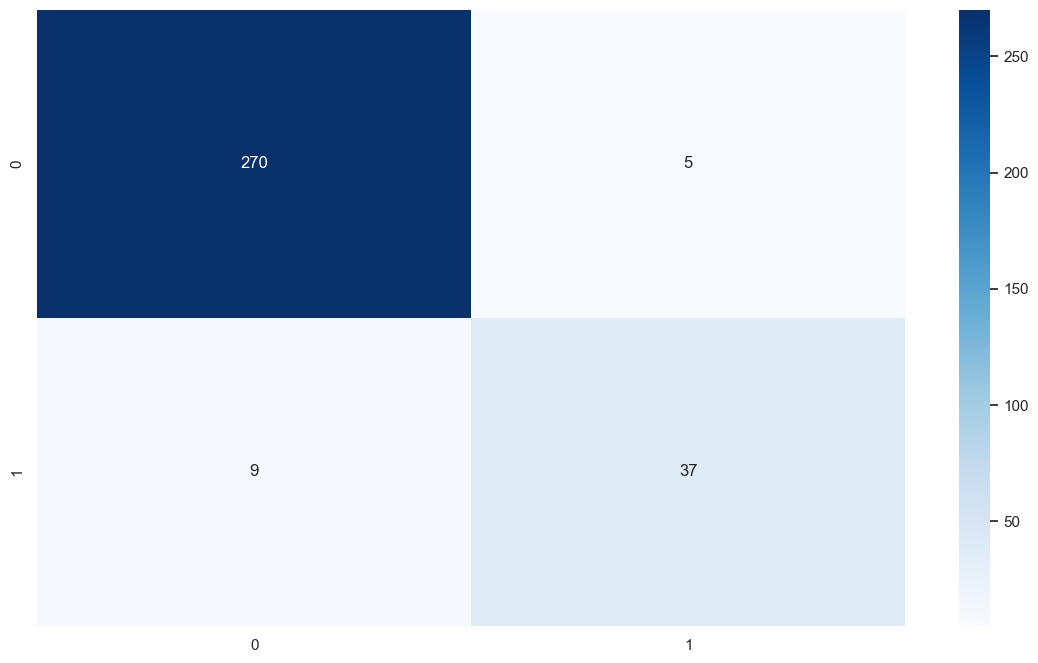

In [650]:
y_predict = gridsearch.predict(X_test)

scoring_and_matrix(y_test, y_predict)

accuracy: 1.0 
     precision: 1.0 
     recall: 1.0 
     f1_score: 1.0


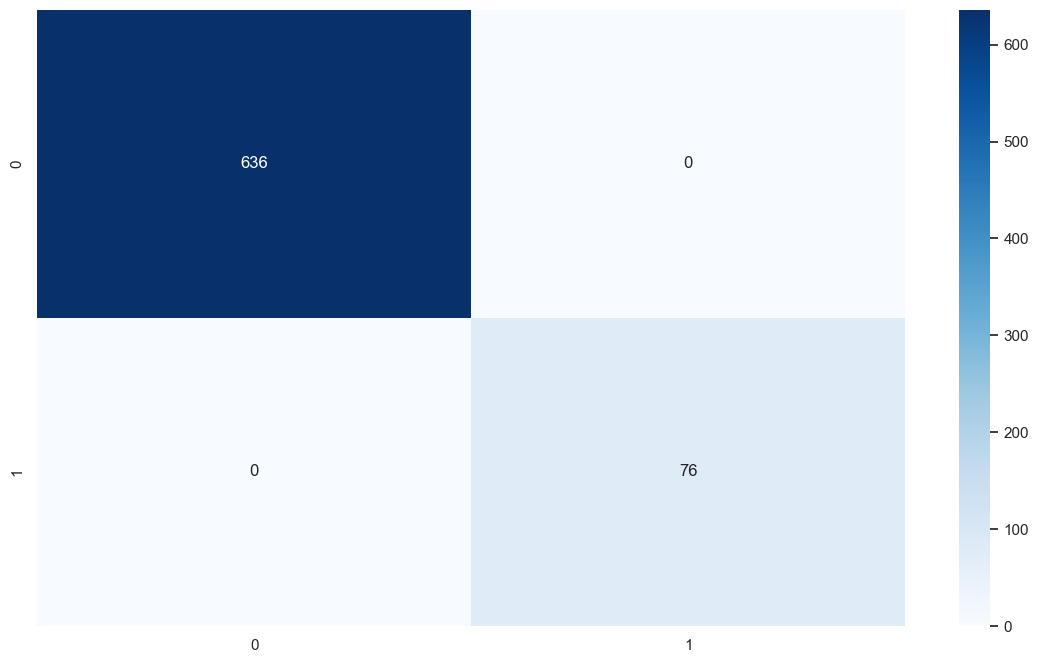

In [651]:
y_predict = gridsearch.predict(X_perevirka)

scoring_and_matrix(y_perevirka, y_predict)

In [652]:
mse, bias, var = bias_variance_decomp(gridsearch.best_estimator_, X_train.values, \
    y_train.values, X_test.values, y_test.values, random_seed=10)
bias_var(bias, var)

Bias: 0.04361370716510903, var: 0.03034267912772585


Великої різниці між індивідуальною моделью та ансамблем по метрикам немає, одне дерево без налаштування параметрів показує себе не гірше на усіх підвибірках даних, як і ансамбль <br>
Час навчання моделі дуже низький, на моєму компьютері я не бачу різниці між індивідуальною моделью та ансамблем <br>
Значення зміщення та дисперсії для моделі та ансамблю також майже не відрізняються (для одного дерева навіть краще)

<font size=5> Висновок: </font> <br>
На цьому датасеті можна сказать, що різниці між ансамблем та індивідуальною моделью різниці не було

Цікаво, що якщо поділити датасет на 2 підвибірки (як було зазвичай), то дерево (з не налаштованими параметрами) показує себе краще тільки на даних які воно бачило при навчанні (_ps_train), а ансамбль краще на тих яких при навчанні не було (_ps_test)

In [653]:
X_ps_train, X_ps_test, y_ps_train, y_ps_test = train_test_split(X_full, y_full, test_size=0.2, random_state=13)

In [654]:
tree_ps = DecisionTreeClassifier().fit(X_ps_train, y_ps_train)

accuracy: 1.0 
     precision: 1.0 
     recall: 1.0 
     f1_score: 1.0


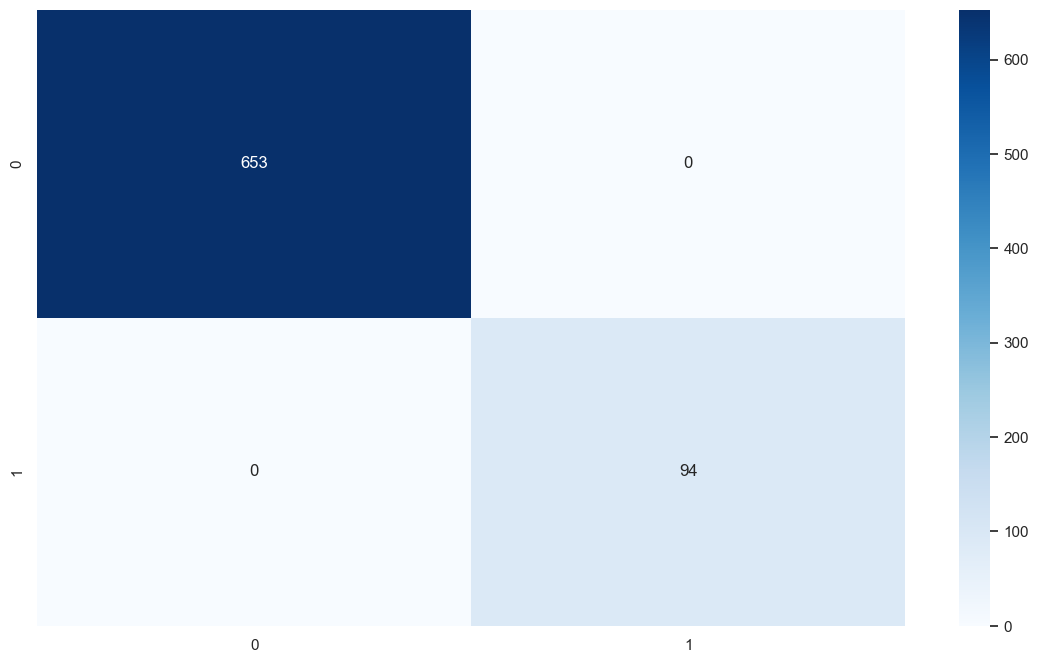

In [655]:
y_predict = tree_ps.predict(X_train)

scoring_and_matrix(y_train, y_predict)

accuracy: 1.0 
     precision: 1.0 
     recall: 1.0 
     f1_score: 1.0


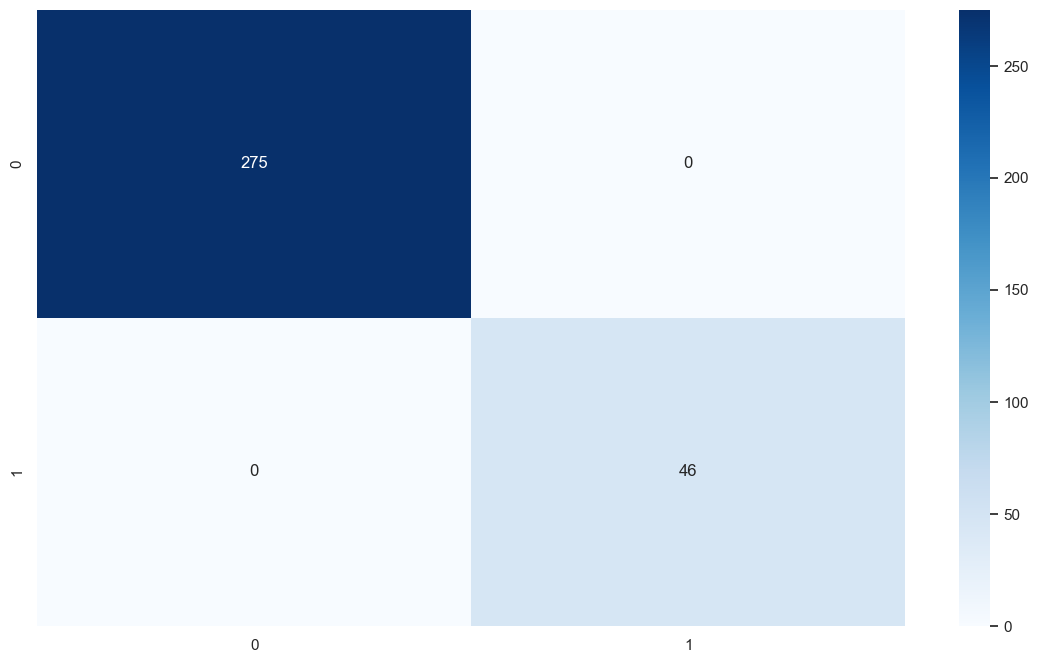

In [656]:
y_predict = tree_ps.predict(X_test)

scoring_and_matrix(y_test, y_predict)

accuracy: 0.9676966292134831 
     precision: 0.8271604938271605 
     recall: 0.881578947368421 
     f1_score: 0.8535031847133758


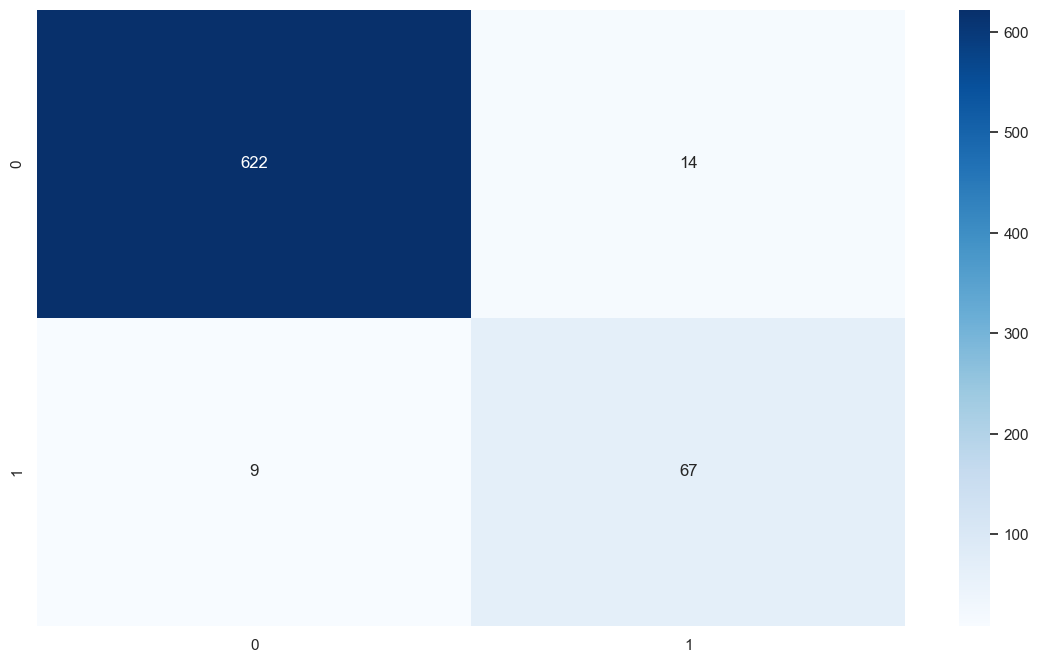

In [657]:
y_predict = tree_ps.predict(X_perevirka)

scoring_and_matrix(y_perevirka, y_predict)

accuracy: 0.9353932584269663 
     precision: 0.631578947368421 
     recall: 0.7272727272727273 
     f1_score: 0.676056338028169


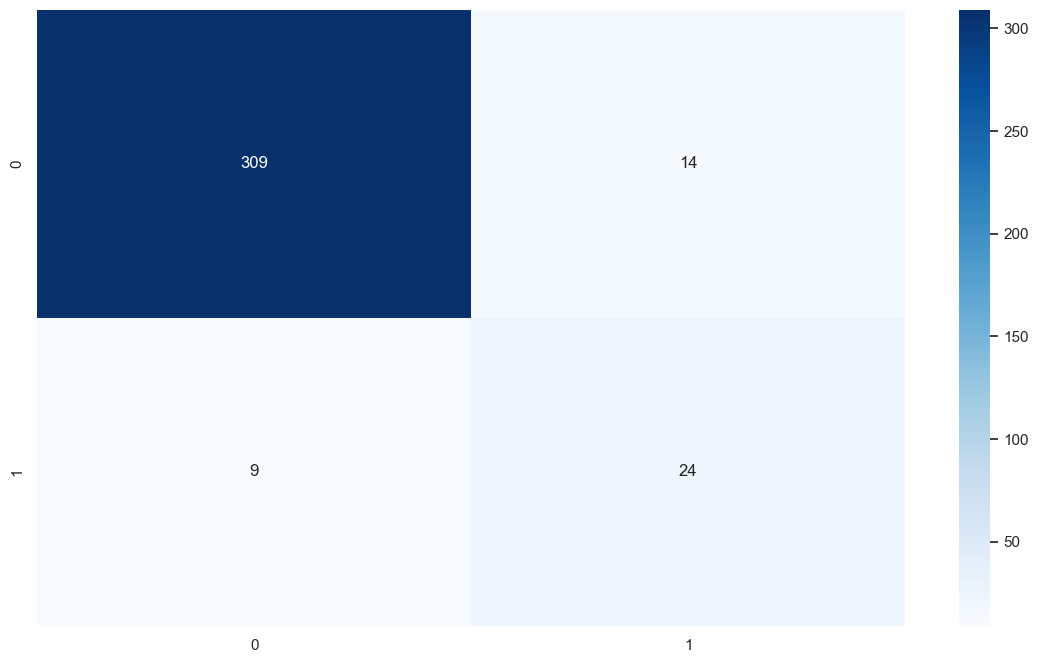

In [658]:
y_predict = tree_ps.predict(X_ps_test)

scoring_and_matrix(y_ps_test, y_predict)

<font size=5> Ансамбль: </font>

In [660]:
GBC_ps = GradientBoostingClassifier(n_estimators=60).fit(X_ps_train, y_ps_train)

accuracy: 0.963855421686747 
     precision: 0.9466666666666667 
     recall: 0.7553191489361702 
     f1_score: 0.8402366863905325


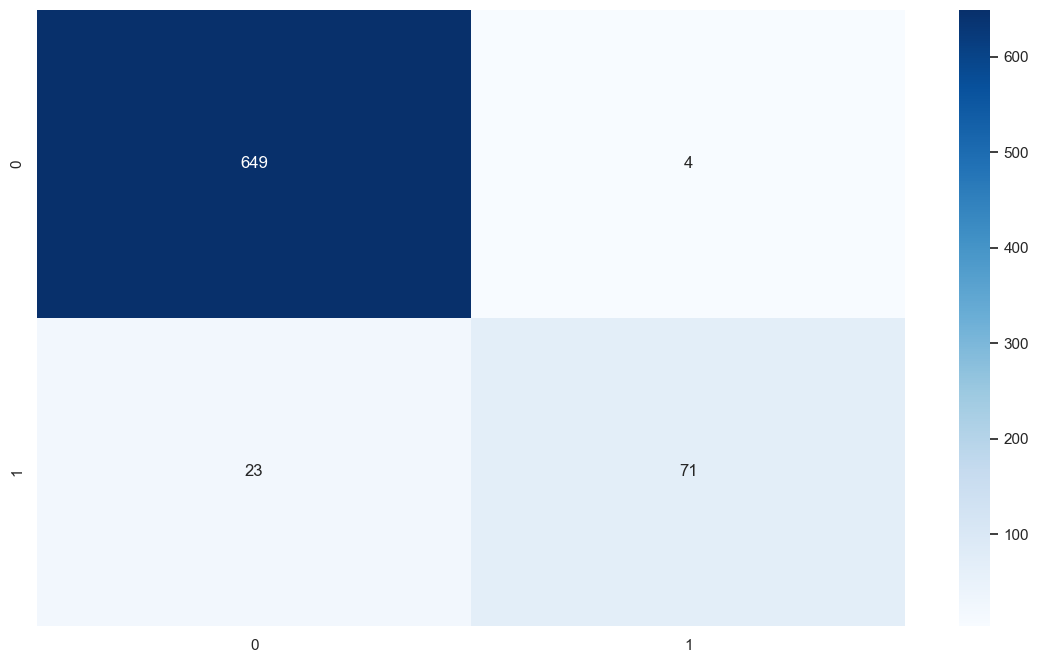

In [661]:
y_predict = GBC_ps.predict(X_train)

scoring_and_matrix(y_train, y_predict)

accuracy: 0.9781931464174455 
     precision: 1.0 
     recall: 0.8478260869565217 
     f1_score: 0.9176470588235294


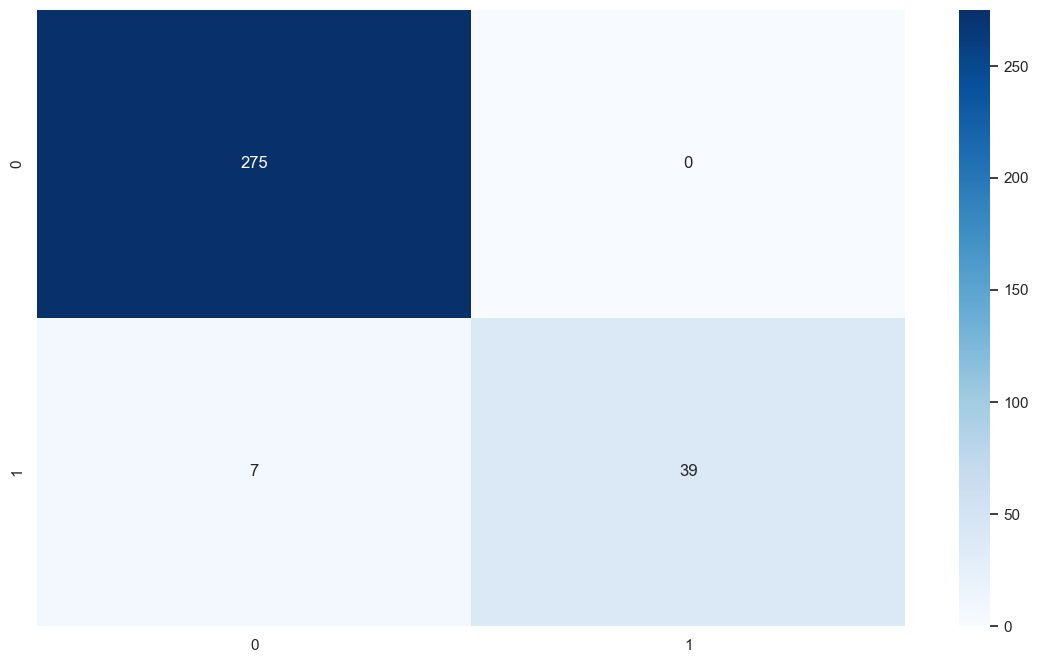

In [662]:
y_predict = GBC_ps.predict(X_test)

scoring_and_matrix(y_test, y_predict)

accuracy: 0.9592696629213483 
     precision: 0.8983050847457628 
     recall: 0.6973684210526315 
     f1_score: 0.7851851851851851


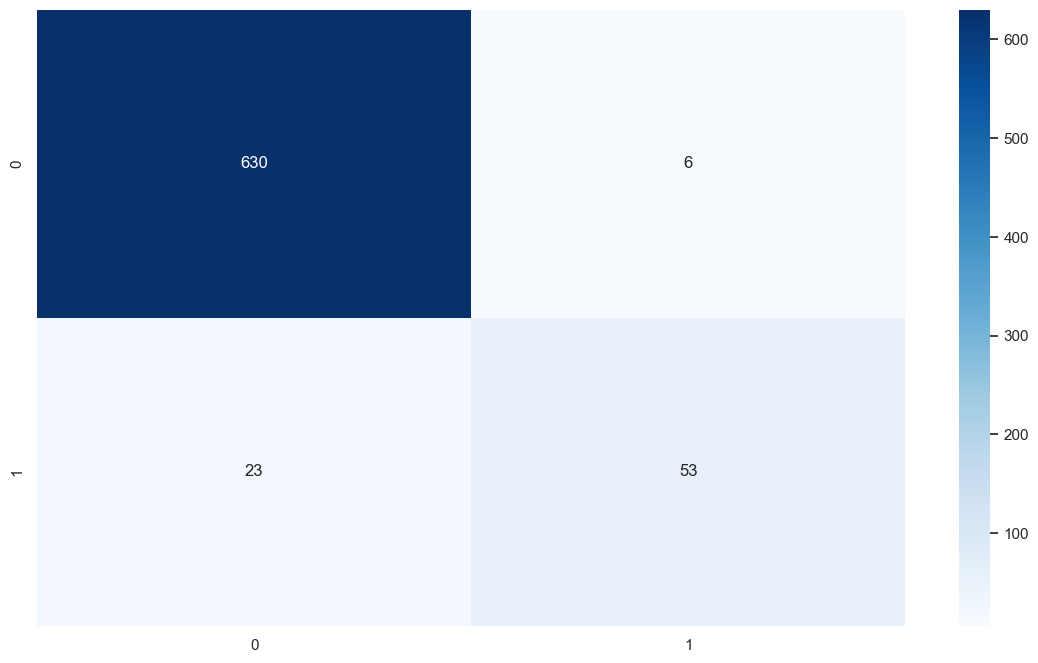

In [663]:
y_predict = GBC_ps.predict(X_perevirka)

scoring_and_matrix(y_perevirka, y_predict)

accuracy: 0.952247191011236 
     precision: 0.8076923076923077 
     recall: 0.6363636363636364 
     f1_score: 0.7118644067796609


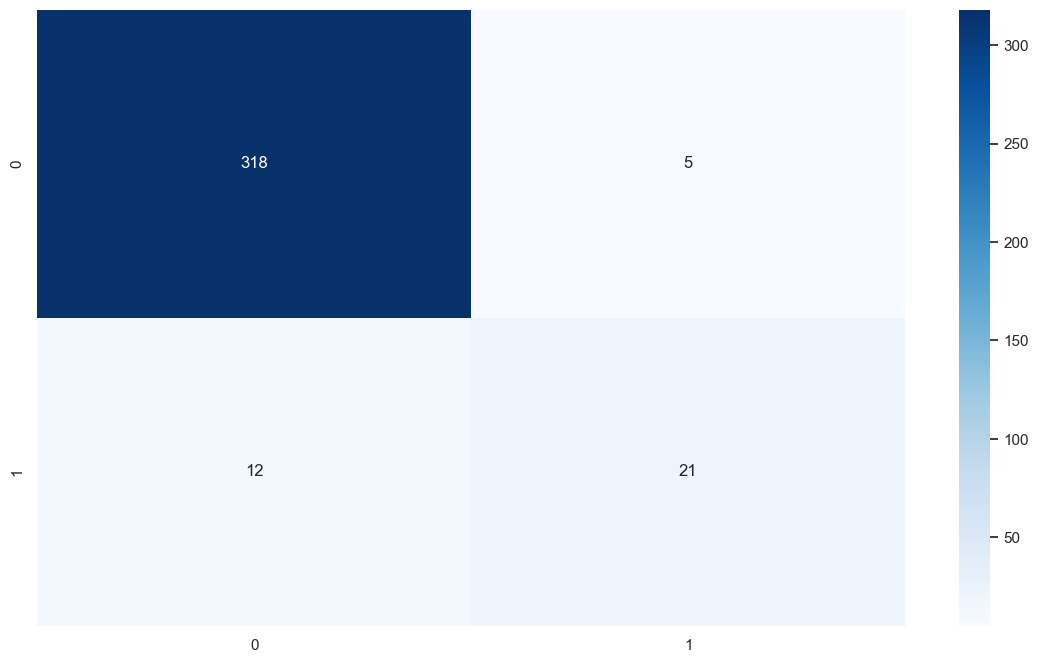

In [664]:
y_predict = GBC_ps.predict(X_ps_test)

scoring_and_matrix(y_ps_test, y_predict)